# Data Bootcamp Final Project

## ECON-UB 232
## Weiting Hong, William Jin, Nick Leung, Brandon K Lee
## Professor Zweig

## Introduction
Over the past half a decade, there has been a huge effort by companies of all industries to expand their grounds of diversity in an attempt to promote an open-minded and welcoming atmosphere for their employees. The idea is that diversity fosters creativity of different thoughts and ideas which can give rise to more efficient solutions outside the scope of traditional thinking.
Initially, the diversity within business movement began in the 1960s as a part of a societal push for businesses to comply with the objectives of equal opportunity employment act [1]. Through the expansion of diversity, however, companies speculated the existence of benefits of greater innovation that could be derived from teams of a wider variety of backgrounds. This social justice model, originally created to stimulate equal employment opportunity for people of all different identities, quickly evolved into an assumed way for corporations to become more profitable, leading to the large-scale diversity recruiting programs we see today. 

In various business models, it is projected that corporations lacking strong inclusion of diversity inherently are less productive, have a negative work culture, as well as a higher employee turnover rate. A Mckinsey report also claims that these not only directly affect the company through decreased efficiency and performance but also through the heightened costs. Due to the turnover rates, whether that be a loss of time, loss of resources, and loss of money spent on the ex-employees companies incur large costs associated with this problem [2]. In addition, organizations that plan to expand into global markets, believe that a diverse team will cause them to appear more externally inviting. Additionally internally, corporations claim further benefits of greater creativity, higher productivity, quicker problem solving and enhanced decision making. 

In our freshman CLP class, many of these same claims were made about diversity’s huge benefits. However, they didn’t provide us with any statistical data on the matter which made us call into question the validity of the claims. We wanted to know if the huge advantages given to diversity candidates were actually helping a company’s profitability in the ways they said it is or if there was an alternative motive, such as better optics for the company. So, we decided to look at the industry where diversity is most highly regarded, tech [5]. 

This project focuses on diversity in the tech sector and its impact on companies profitability. 
We examined the data on the correlation of diversity on EBITDA to test these assertions made in our CLP class and in the business world. 

Note: There are more factors besides the ability to yield a profit that determines a company’s success. However, financial data is the most abundant and quantitatively driven source of information that is available to us. 


## Exploring and importing overall diversity data
First, we will import numpy, pandas, and pyplot to assist future data cleaning, management, and presentation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's import our first dataset. The dataset `tech_diversity` contains 2016 sector-wide demographic information that informs us of the overall diversity landscape among tech companies. We used EEO-1 forms filled out by Silicon Valley companies from the Equal Employment Opportunity Commision to retrieve information about the racial breakdown down of these companies by job title. [6]

In [2]:
tech_diversity = pd.read_csv("C:/Users/weiti/Desktop/Freshman Fall/ECON-UB 232/finalProject/Tech_sector_diversity_demographics_2016.csv")
tech_diversity = tech_diversity.loc[(tech_diversity['race_ethnicity'] != 'All') &
                                    (tech_diversity['race_ethnicity'] != 'Totals') &
                                    (tech_diversity['gender'] != 'Both'),]
tech_diversity

,job_category,race_ethnicity,gender,count,percentage
0,All workers,White,Male,268883,41.257252
1,All workers,White,Female,105560,16.197065
2,All workers,Black_or_African American,Male,17508,2.686417
3,All workers,Black_or_African American,Female,11479,1.761331
4,All workers,Asian,Male,125347,19.233171
5,All workers,Asian,Female,58049,8.907005
6,All workers,Hispanic_or_Latino,Male,32201,4.940903
7,All workers,Hispanic_or_Latino,Female,15512,2.380152
11,Executives,White,Male,7282,58.678485
12,Executives,White,Female,1818,14.649476


Variable Breakdown for Tech Diversity Data Frame

company: Name of the company

year: 2016

race: Possible values: "American_Indian_Alaskan_Native", "Asian", "Black_or_African_American", "Latino", "Native_Hawaiian_or_Pacific_Islander", "Two_or_more_races", "White", "Overall_totals"

gender: Possible values: "male", "female". Non-binary gender is not counted in EEO-1 reports.

job_category: Possible values: "Administrative support", "Craft workers", "Executive/Senior officials & Mgrs", "First/Mid officials & Mgrs", "laborers and helpers", "operatives", "Professionals", "Sales workers", "Service workers", "Technicians", "Previous_totals", "Totals"

count: Mostly integer values, but contains "na" for a no-data variable.

Let's take a look at the racial and gender distribution within tech industry as a whole. However, for labeling purposes, let's write a function that replaces all underscores with spaces first.

In [3]:
def underscore_to_space(input):
    output = [s.replace('_',' ') for s in input]
    return output

Now we will examine the racial diversity across all workers and the racial diversity exhibited by managerial level and above. We aggregate gender counts to get overall race counts, then we produce the pie charts below:

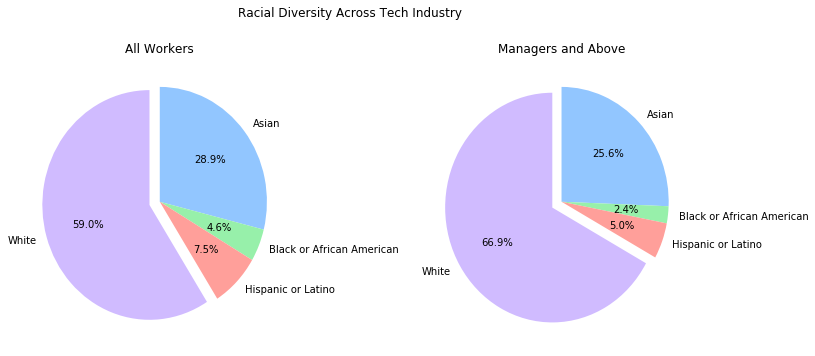

In [4]:
workerCondition = tech_diversity['job_category'] == 'All workers'

race_overall = tech_diversity.loc[workerCondition,].groupby('race_ethnicity', as_index = False).agg({'count':np.sum})
race_overall['percentage'] = 100 * race_overall['count'] / np.sum(race_overall['count'])

workerCondition = (tech_diversity['job_category'] == 'Executives') | (tech_diversity['job_category'] == 'Managers')

race_execmgmt = tech_diversity.loc[workerCondition,].groupby('race_ethnicity', as_index = False).agg({'count':np.sum})
race_execmgmt['percentage'] = 100 * race_execmgmt['count'] / np.sum(race_execmgmt['count'])

plt.style.use('seaborn-pastel')

fig, axarr = plt.subplots(1, 2, figsize = (12,5.5))
axarr[0].pie(x = race_overall['percentage'], labels = underscore_to_space(race_overall['race_ethnicity']), 
             startangle = 90, autopct = '%1.1f%%', counterclock = False, explode = (0,0,0,0.1))
axarr[0].set(title = 'All Workers')
axarr[1].pie(x = race_execmgmt['percentage'], labels = underscore_to_space(race_execmgmt['race_ethnicity']),
             startangle = 90, autopct = '%1.1f%%', counterclock = False, explode = (0,0,0,0.1))
axarr[1].set(title = 'Managers and Above')
fig.suptitle('Racial Diversity Across Tech Industry')
fig.subplots_adjust(wspace = 0.5, top = 0.85)

It seems like, overall, Tech industry is dominated by white and asian races and is especially so on managerial and executive levels. Let's repeat the same exercise on gender by examining male-female compositions:

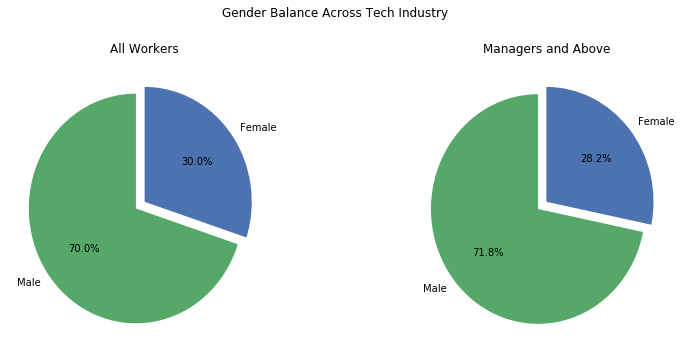

In [5]:
workerCondition = tech_diversity['job_category'] == 'All workers'

gender_overall = tech_diversity.loc[workerCondition,].groupby('gender', as_index = False).agg({'count':np.sum})
gender_overall['percentage'] = 100 * gender_overall['count'] / np.sum(gender_overall['count'])

workerCondition = (tech_diversity['job_category'] == 'Executives') | (tech_diversity['job_category'] == 'Managers')

gender_execmgmt = tech_diversity.loc[workerCondition,].groupby('gender', as_index = False).agg({'count':np.sum})
gender_execmgmt['percentage'] = 100 * gender_execmgmt['count'] / np.sum(gender_execmgmt['count'])

plt.style.use('seaborn-deep')

fig, axarr = plt.subplots(1, 2, figsize = (12,5.5))
axarr[0].pie(x = gender_overall['percentage'], labels = underscore_to_space(gender_overall['gender']), 
             startangle = 90, autopct = '%1.1f%%', counterclock = False, explode = (0,0.1))
axarr[0].set(title = 'All Workers')
axarr[1].pie(x = gender_execmgmt['percentage'], labels = underscore_to_space(gender_execmgmt['gender']),
             startangle = 90, autopct = '%1.1f%%', counterclock = False, explode = (0,0.1))
axarr[1].set(title = 'Managers and Above')
fig.suptitle('Gender Balance Across Tech Industry')
fig.subplots_adjust(wspace = 0.5, top = 0.85)

The gender balance is even worse than racial diversity in tech industries, and, in both cases, the imbalance is more significant at managerial levels and above.

## Exploring and importing Silicon Valley tech company data

After exploring overall racial diversity and gender balance data across the industry, let's examine the tech companies in silicon valley. First, we will import the 2016 company-specific data and name the dataset `distribution_data_raw`.

In [6]:
distribution_data_raw = pd.read_csv("C:/Users/weiti/Desktop/Freshman Fall/ECON-UB 232/finalProject/Distributions_data_2016.csv")
distribution_data_raw.head(5)

,company,percentage,demographics,job_category
0,anonymous,0.0,Hispanic_or_Latino,Professionals
1,anonymous,0.0,Hispanic_or_Latino,Professionals
2,anonymous,0.8,Hispanic_or_Latino,Professionals
3,anonymous,1.3,Hispanic_or_Latino,Professionals
4,anonymous,1.6,Hispanic_or_Latino,Professionals


Although the set is rich in information, many company names are hidden and we do not have reference indices to group them by company. The set has been previously sorted, and the original data structure cannot be observed. Therefore, we will clean the data by eliminating all entries with company name 'anonymous.'

In [7]:
distribution_data = distribution_data_raw.loc[distribution_data_raw["company"] != "anonymous",]
distribution_data = distribution_data.sort_values(axis = 0, ascending = False, by = "company")
distribution_data.head(5)

,company,percentage,demographics,job_category
19,eBay,2.6,Hispanic_or_Latino,Professionals
12691,eBay,12.0,Asian_female,Managers
9047,eBay,5.2,Underrepresented_minorities,Executives-Managers-Professionals
936,eBay,10.3,White_female,Professionals
9268,eBay,3.4,Hispanic_or_Latino,Executives and Managers


Let's see if the number of entries per company name, demographic categories, and job categories is uniform because that would indicate the remaining categories are standardized: 

In [8]:
print(distribution_data['company'].value_counts())

HPE           91
NetApp        91
Nvidia        91
Google        91
LinkedIn      91
Salesforce    91
Intel         91
Adobe         91
Intuit        91
Facebook      91
View          91
Pinterest     91
PayPal        91
HP Inc.       91
23andMe       91
Lyft          91
Airbnb        91
Apple         91
Uber          91
Cisco         91
Twitter       91
MobileIron    91
eBay          91
Sanmina       91
Square        91
Name: company, dtype: int64


In [9]:
print(distribution_data['demographics'].value_counts())

Underrepresented_minorities           175
Hispanic_or_Latino                    175
Asian                                 175
Women_of_color                        175
Asian_female                          175
Female_total                          175
Black_or_African_American_female      175
White_female                          175
Black_or_African_American             175
Underrepresented_minorities_female    175
White                                 175
Hispanic_or_Latino_female             175
People_of_color                       175
Name: demographics, dtype: int64


In [10]:
print(distribution_data['job_category'].value_counts())

Executives                                            325
Professionals                                         325
All Workers                                           325
Executives and Managers                               325
Executives-Managers-Professionals                     325
Managers                                              325
Sales workers/admin support/technicians and others    325
Name: job_category, dtype: int64


All the numbers are uniform -- we are good to go.

## Exploring and Importing Financial Performance Data

Since the original dataset does not provide financial performance data associated with these corporate entities, we conducted our own research to get the 2016 financial performance metrics for most companies. Let's take a look at the dataset:

We used each companies financial statements from 2016, since that's the year the diversity data is from, and imported different line items into an excel spreadsheet. Using that financial data we calculated Net Margins, Gross Margins, Operating Margins, EBITDA Margins, Pre-Tax Margins. We used margins because it simplifies financial statements and neglects factors such as size when comparing multiple companies within the same sector. 

In [11]:
sv_financials = pd.read_csv("C:/Users/weiti/Desktop/Freshman Fall/ECON-UB 232/finalProject/siliconValleyFinacials.csv")
sv_financials

,company,ownership,TTM_Net_Margins,TTM_Gross_Margins,TTM_Operating_Margins,EBITDA_Margins,Pre-Tax_Profit_Margins
0,Pinterest,private,NaN,NaN,NaN,NaN,NaN
1,Square,public,-10.40%,33.71%,-9.98%,-7.72%,-9.89%
2,MobileIron,public,-40.98%,81.36%,-40.97%,-37.80%,-40.24%
3,PayPal,public,12.92%,47.42%,14.63%,21.31%,15.04%
4,Nvidia,public,19.86%,57.84%,23.64%,21.11%,31.66%
5,HP Inc.,public,5.17%,18.41%,7.14%,8.05%,7.80%
6,Airbnb,private,NaN,NaN,NaN,NaN,NaN
7,Lyft,private,NaN,NaN,NaN,NaN,NaN
8,View,private,NaN,NaN,NaN,NaN,NaN
9,Uber,private,NaN,NaN,NaN,NaN,NaN


Variable Breakdown for sv_finacial Data Frame

company: Name of the Company 

year: 2016

ownership: refers to if the company is publicly or privately held 
-Possible Values: “private” or  “public”

TTM_Net_Margins: company’s net-profit/revenue

TTM_Gross_Margins: company’s gross-profits/revenue

TTM_Operating_Margins: company’s operating-income/net-sales

EBITDA_Margins: company’s (earnings-before-interest, tax, depreciation and amortization) / total-revenue

Pre-Tax_Profit_Margins: company’s pre-tax-earnings/total sales


We filter out any private companies for they are not required to release their performance metrics. We are unable to evaluate LinkedIn's performance in 2016 becaue it was acquired by Microsoft in December, 2016, so we will apply `dropna` on the dataset along with a filter for public companies.

Moreover, the percentage figures in the chart above are string elements. We will convert them to floating point decimals for further calculation:

In [12]:
sv_public = sv_financials.loc[(sv_financials['ownership'] == "public"),].dropna()
sv_public['TTM_Net_Margins'] = (sv_public['TTM_Net_Margins'].str.replace("%","").astype(float))*0.01
sv_public['TTM_Gross_Margins'] = (sv_public['TTM_Gross_Margins'].str.replace("%","").astype(float))*0.01
sv_public['TTM_Operating_Margins'] = (sv_public['TTM_Operating_Margins'].str.replace("%","").astype(float))*0.01
sv_public['EBITDA_Margins'] = (sv_public['EBITDA_Margins'].str.replace("%","").astype(float))*0.01
sv_public['Pre-Tax_Profit_Margins'] = (sv_public['Pre-Tax_Profit_Margins'].str.replace("%","").astype(float))*0.01
sv_public

,company,ownership,TTM_Net_Margins,TTM_Gross_Margins,TTM_Operating_Margins,EBITDA_Margins,Pre-Tax_Profit_Margins
1,Square,public,-0.1040,0.3371,-0.0998,-0.0772,-0.0989
2,MobileIron,public,-0.4098,0.8136,-0.4097,-0.3780,-0.4024
3,PayPal,public,0.1292,0.4742,0.1463,0.2131,0.1504
4,Nvidia,public,0.1986,0.5784,0.2364,0.2111,0.3166
5,HP Inc.,public,0.0517,0.1841,0.0714,0.0805,0.0780
10,Adobe,public,0.1996,0.8660,0.2551,0.3417,0.2461
11,Intuit,public,0.2059,0.2543,0.8384,0.3043,0.2641
12,Cisco,public,0.2173,0.6340,0.2547,0.2952,0.2604
13,HPE,public,0.1044,0.3228,0.1289,0.3536,0.1275
14,Facebook,public,0.3686,0.8629,0.4490,0.4529,0.4529


Let's check the column data types:

In [13]:
sv_public.dtypes

company                    object
ownership                  object
TTM_Net_Margins           float64
TTM_Gross_Margins         float64
TTM_Operating_Margins     float64
EBITDA_Margins            float64
Pre-Tax_Profit_Margins    float64
dtype: object

The company financial data is good to go. As a side note, although we will primarily conduct our analysis with the EBITDA measure for its reputation as an excellent performance metric, we keep other columns for potential reference.

## Part I: Examine correlation between racial diversity and profitability in Silicon Valley companies

Previously when we explored the company-specific diversity dataset, we realize that the dataset included both racial and gender information within the same column. For Part I, we will only analyze the racial information, so let's first determine the criteria. We will only examine the company-wide percentages of White, Black or African American, Asian, and Hispanic or Latino employees at different job levels for simplicity's sake. We will filter out gender categorization for this part. We determine the criteria to be:

In [14]:
race_condition = ((distribution_data['demographics'] != "Underrepresented_minorities") &
                (distribution_data['demographics'] != "People_of_color") &
                (distribution_data['demographics'].str.lower().str.find('female') == -1) &
                (distribution_data['demographics'].str.lower().str.find('women') == -1))

Now we will filter the data based on our criteria, sort the data by company, job category, and demographics, and check our work:

When cleaning the data, we noticed that the data set contained racial categories that overlapped with each other or grouped many different races under one category. In order to make sure the overlapping data didn’t skew our final results, we decided to take out underrepresented minorities, as well as people of color since the races in those groups, such as Black, Asian, and have their own individual categories. 


In [15]:
distribution_data_filtered = distribution_data.loc[race_condition,]
distribution_data_filtered = distribution_data_filtered.sort_values(by = ["company","job_category","demographics"], 
                                                                    axis = 0)
distribution_data_filtered['demographics'].value_counts()

Hispanic_or_Latino           175
Black_or_African_American    175
White                        175
Asian                        175
Name: demographics, dtype: int64

It is a good sign that the numbers are uniform. Let's examine the job categories:

In [16]:
np.unique(distribution_data_filtered['job_category'])

array(['All Workers', 'Executives', 'Executives and Managers',
       'Executives-Managers-Professionals', 'Managers', 'Professionals',
       'Sales workers/admin support/technicians and others'], dtype=object)

Everything seems good except for 'Sales workers/admin support/technicians and others.' Let's replace it with 'Others.' We will also change the percentage figures to their decimal forms and rename the 'percentage' column as 'proportion.'

In [17]:
label = "Sales workers/admin support/technicians and others"
distribution_data_filtered['job_category'] = distribution_data_filtered['job_category'].str.replace(label, "Others")
distribution_data_filtered['percentage'] = distribution_data_filtered['percentage'] * 0.01
distribution_data_filtered = distribution_data_filtered.rename(columns = {'percentage':'proportion'})
distribution_data_filtered.head(5)

,company,proportion,demographics,job_category
5191,23andMe,0.236,Asian,All Workers
5001,23andMe,0.017,Black_or_African_American,All Workers
4707,23andMe,0.064,Hispanic_or_Latino,All Workers
4904,23andMe,0.626,White,All Workers
2854,23andMe,0.059,Asian,Executives


The racial diversity dataset is ready to go!

## Racial Composition Overview: All Workers

In this section, we will overview each company's racial diversity through a stacked horizontal bar chart. The sector-wide proportion is denoted by vertical lines with corresponding colors for reference:

In [18]:
from matplotlib.patches import Rectangle

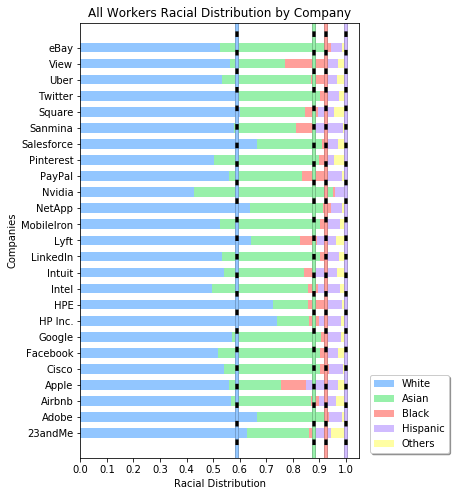

In [19]:
numCompanies = len(np.unique(distribution_data_filtered['company']))
ind = np.arange(numCompanies)
height = 0.6

allWorker_criteria = distribution_data_filtered['job_category'] == 'All Workers'

asianProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'Asian') &
                                                allWorker_criteria,]['proportion'])
whiteProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'White') & 
                                                allWorker_criteria,]['proportion'])
blackProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'Black_or_African_American') &
                                                allWorker_criteria,]['proportion'])
hispanicProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'Hispanic_or_Latino') &
                                                   allWorker_criteria,]['proportion'])
companies = list(np.unique(distribution_data_filtered['company']))

plt.style.use('seaborn-pastel')

plt.figure(figsize=(5,8))

white = plt.barh(y = ind, width = whiteProp, height = height)
asian = plt.barh(y = ind, width = asianProp, height = height,
                 left = whiteProp)
black = plt.barh(y = ind, width = blackProp, height = height, 
                 left = [sum(x) for x in zip(asianProp, whiteProp)])
hispanic = plt.barh(y = ind, width = hispanicProp, height = height,
                    left = [sum(x) for x in zip(asianProp, whiteProp, blackProp)])
others = plt.barh(y = ind, width = [(1 - y) for y in [sum(x) for x in zip(asianProp, whiteProp, blackProp, hispanicProp)]],
                 height = height,
                 left = [sum(x) for x in zip(asianProp, whiteProp, blackProp, hispanicProp)])

plt.ylabel('Companies')
plt.xlabel('Racial Distribution')
plt.title('All Workers Racial Distribution by Company')
plt.yticks(ind, companies)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.legend((white[0], asian[0], black[0], hispanic[0], others[0]), ('White', 'Asian', 'Black', 'Hispanic', 'Others'),
          loc = 'lower left', bbox_to_anchor = (1.02, 0), shadow = True)

dist = 0
for race in [['White',white], ['Asian',asian], ['Black_or_African American',black], ['Hispanic_or_Latino', hispanic]]:
    bars = [r for r in race[1].get_children() if type(r) == Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]]
    dist = dist + float(race_overall.loc[race_overall['race_ethnicity'] == race[0], 'percentage']*0.01)
    plt.axvline(dist, color = 'black', linestyle = '-', linewidth = 3.5)
    plt.axvline(dist, color = colors[1], linestyle = '--', linewidth = 3.5)

plt.show()

It seems like the racial diversity in Silicon Valley tech companies does not significantly differ from the sector average. Let's conduct a Chi-square Goodness-of-Fit test to affirm our observation, with the null hypothesis being that there exists no significant differences between the observed proportions and tech sector average proportions:

In [20]:
from scipy.stats import chisquare

In [21]:
exp_arr = [float(race_overall.loc[race_overall['race_ethnicity'] == 'White', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Asian', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Black_or_African American', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Hispanic_or_Latino', 'percentage']*0.01)]

In [22]:
chisquare(f_obs = np.array([whiteProp, asianProp, blackProp, hispanicProp]).T,
          f_exp = exp_arr)

Power_divergenceResult(statistic=array([0.2184519 , 0.7117694 , 0.54233857, 0.24223842]), pvalue=array([1., 1., 1., 1.]))

Since p-values all approximates to 1, we conclude that the Silicon Valley tech company's diversity data fits the those of the tech sector average.

## Racial Composition Overview: Executives and Managers

We analyze the racial diversity among Silicon Valley employees that are managers and above through the same method:

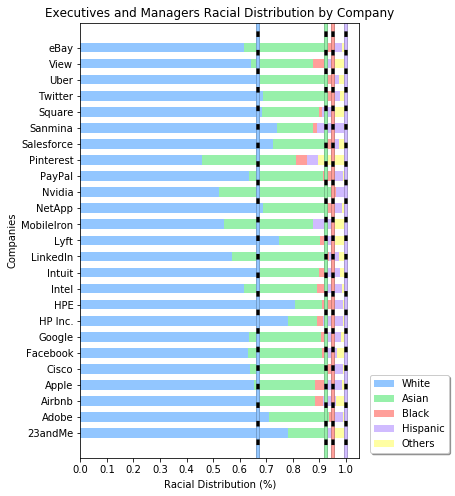

In [23]:
numCompanies = len(np.unique(distribution_data_filtered['company']))
ind = np.arange(numCompanies)
height = 0.6

execMgmt_criteria = distribution_data_filtered['job_category'] == 'Executives and Managers'

asianProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'Asian') &
                                                execMgmt_criteria,]['proportion'])
whiteProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'White') & 
                                                execMgmt_criteria,]['proportion'])
blackProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'Black_or_African_American') &
                                                execMgmt_criteria,]['proportion'])
hispanicProp = list(distribution_data_filtered.loc[(distribution_data_filtered['demographics'] == 'Hispanic_or_Latino') &
                                                   execMgmt_criteria,]['proportion'])
companies = list(np.unique(distribution_data_filtered['company']))

plt.style.use('seaborn-pastel')

plt.figure(figsize=(5,8))

white = plt.barh(y = ind, width = whiteProp, height = height)
asian = plt.barh(y = ind, width = asianProp, height = height, 
                 left = whiteProp)
black = plt.barh(y = ind, width = blackProp, height = height, 
                 left = [sum(x) for x in zip(asianProp, whiteProp)])
hispanic = plt.barh(y = ind, width = hispanicProp, height = height,
                    left = [sum(x) for x in zip(asianProp, whiteProp,blackProp)])
others = plt.barh(y = ind, width = [(1 - y) for y in [sum(x) for x in zip(asianProp, whiteProp, blackProp, hispanicProp)]],
                 height = height,
                 left = [sum(x) for x in zip(asianProp, whiteProp,blackProp, hispanicProp)])

plt.ylabel('Companies')
plt.xlabel('Racial Distribution (%)')
plt.title('Executives and Managers Racial Distribution by Company')
plt.yticks(ind, companies)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.legend((white[0], asian[0], black[0], hispanic[0], others[0]), ('White', 'Asian', 'Black', 'Hispanic', 'Others'),
          loc = 'lower left', bbox_to_anchor = (1.02, 0), shadow = True)

dist = 0
for race in [['White',white], ['Asian',asian], ['Black_or_African American',black], ['Hispanic_or_Latino', hispanic]]:
    bars = [r for r in race[1].get_children() if type(r) == Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]]
    dist = dist + float(race_execmgmt.loc[race_execmgmt['race_ethnicity'] == race[0], 'percentage']*0.01)
    plt.axvline(dist, color = 'black', linestyle = '-', linewidth = 3.5)
    plt.axvline(dist, color = colors[1], linestyle = '--', linewidth = 3.5)

plt.show()

Let's conduct a Chi-square Goodness-of-Fit test on this set of observations:

In [24]:
exp_arr = [float(race_execmgmt.loc[race_execmgmt['race_ethnicity'] == 'White', 'percentage']*0.01),
           float(race_execmgmt.loc[race_execmgmt['race_ethnicity'] == 'Asian', 'percentage']*0.01),
           float(race_execmgmt.loc[race_execmgmt['race_ethnicity'] == 'Black_or_African American', 'percentage']*0.01),
           float(race_execmgmt.loc[race_execmgmt['race_ethnicity'] == 'Hispanic_or_Latino', 'percentage']*0.01)]

In [25]:
chisquare(f_obs = np.array([whiteProp, asianProp, blackProp, hispanicProp]).T,
          f_exp = exp_arr)

Power_divergenceResult(statistic=array([0.24790875, 0.60116586, 0.12456069, 0.17175217]), pvalue=array([1., 1., 1., 1.]))

Since all p-values are close to 1, we conclude that the Silicon Valley tech companies' racial diversity data do not significantly differ from those of the tech industry on both all-worker and managers-and-above levels.

## Examine correlation

After concluding that Silicon Valley tech companies are decent snapshots of the racial diversity situation across the tech industry, let's examine the correlation between racial diversity and company profitability (as measured by EBITDA margin). First, we design the <b>Racial Diversity Index</b> of a company to be: $$RDI = \prod Proportion\ of\ Race\ i$$, where we only consider the proportions of the races White, Asian, Black or African American, and Hispanic or Latino. We calculate these indicators for every job category for every company.

In [26]:
temp = pd.merge(distribution_data_filtered.loc[distribution_data_filtered['job_category'] == "All Workers",]
                .groupby('company', as_index = False).agg({'proportion':np.prod}),
                distribution_data_filtered.loc[distribution_data_filtered['job_category'] == "Executives",]
                .groupby('company', as_index = False).agg({'proportion':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_filtered.loc[distribution_data_filtered['job_category'] == "Managers",]
                .groupby('company', as_index = False).agg({'proportion':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp, 
                distribution_data_filtered.loc[distribution_data_filtered['job_category'] == "Professionals",]
                .groupby('company', as_index = False).agg({'proportion':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_filtered.loc[distribution_data_filtered['job_category'] == "Others",]
                .groupby('company', as_index = False).agg({'proportion':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_filtered.loc[distribution_data_filtered['job_category'] == "Executives and Managers",]
                .groupby('company', as_index = False).agg({'proportion':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_filtered.loc[distribution_data_filtered['job_category'] == "Executives-Managers-Professionals",]
                .groupby('company', as_index = False).agg({'proportion':np.prod}), on = "company", how = "inner")

racial_dist = temp
racial_dist.columns = ['company',
                       'ri_allWorkers',
                       'ri_executives',
                       'ri_managers',
                       'ri_professionals',
                       'ri_others',
                       'ri_exec_mgmt',
                       'ri_exec_mgmt_prof']

racial_dist

,company,ri_allWorkers,ri_executives,ri_managers,ri_professionals,ri_others,ri_exec_mgmt,ri_exec_mgmt_prof
0,23andMe,0.000161,0.000000,0.000000,0.000281,0.000272,0.000000,0.000138
1,Adobe,0.000128,0.000000,0.000092,0.000127,0.000142,0.000092,0.000112
2,Airbnb,0.000324,0.000109,0.000253,0.000277,0.000324,0.000210,0.000277
3,Apple,0.001238,0.000057,0.000356,0.000181,0.001048,0.000356,0.000240
4,Cisco,0.000338,0.000081,0.000192,0.000345,0.000161,0.000187,0.000325
5,Facebook,0.000205,0.000160,0.000121,0.000182,0.000382,0.000138,0.000175
6,Google,0.000238,0.000000,0.000208,0.000177,0.000572,0.000207,0.000185
7,HP Inc.,0.000276,0.000065,0.000153,0.000244,0.000282,0.000141,0.000226
8,HPE,0.000382,0.000044,0.000138,0.000408,0.000365,0.000131,0.000351
9,Intel,0.000564,0.000032,0.000315,0.000416,0.000772,0.000309,0.000416


Since RDI caps at 0.25^4 or approximately 0.0039, RIs are very small. To make them easier for visual assessment and better for modeling, let's standardize them by replacing them with their z-scores relative to their peers. Since this operation will be repeated quite a few times, we will construct a function:

In [27]:
def num_to_z_score(df):
    temp = df
    columnTypes = (df.dtypes == 'float64')
    columnNames = df.columns
    for i in range(0,temp.shape[1]):
        if(columnTypes[i]):
            mean = temp[columnNames[i]].mean()
            std = temp[columnNames[i]].std()
            temp[columnNames[i]] = (temp[columnNames[i]] - mean) / std
            temp = temp.rename(columns = {columnNames[i]:('z_'+columnNames[i])})
    return(temp)

Let's apply the function on the racial distribution dataset:

In [28]:
racial_dist_z = num_to_z_score(racial_dist)
racial_dist_z

,company,z_ri_allWorkers,z_ri_executives,z_ri_managers,z_ri_professionals,z_ri_others,z_ri_exec_mgmt,z_ri_exec_mgmt_prof
0,23andMe,-0.794395,-0.830288,-1.634144,0.470762,-0.519745,-1.724489,-0.884286
1,Adobe,-0.905267,-0.830288,-0.768249,-1.015200,-0.857797,-0.676166,-1.179205
2,Airbnb,-0.234714,1.117163,0.756169,0.439445,-0.382660,0.681809,0.699383
3,Apple,2.890578,0.190027,1.730284,-0.494372,1.496811,2.356307,0.275554
4,Cisco,-0.186829,0.615345,0.180531,1.089814,-0.808211,0.417085,1.239584
5,Facebook,-0.641817,2.026414,-0.494981,-0.485243,-0.233239,-0.139636,-0.460039
6,Google,-0.530466,-0.830288,0.326770,-0.531729,0.262091,0.648406,-0.347429
7,HP Inc.,-0.398967,0.323156,-0.189976,0.116543,-0.492714,-0.113427,0.110433
8,HPE,-0.037800,-0.047902,-0.333403,1.694031,-0.277265,-0.229605,1.541589
9,Intel,0.583912,-0.254352,1.341244,1.772385,0.779923,1.818801,2.279814


## Exploring Correlations

Now that we have transformed the racial diversity indices, we will merge the ths RDI dataset with the financial performance set. The correlation matrix between standardized racial diversity index among different job categories and the financial performance indiactors is as the following:

In [29]:
combo_race = pd.merge(sv_public, racial_dist_z, on = "company", how = "inner")
racial_corr = combo_race.corr().drop(['TTM_Net_Margins',
                                      'TTM_Gross_Margins',
                                      'TTM_Operating_Margins',
                                      'EBITDA_Margins',
                                      'Pre-Tax_Profit_Margins'], axis = 1).head(5)
racial_corr

,z_ri_allWorkers,z_ri_executives,z_ri_managers,z_ri_professionals,z_ri_others,z_ri_exec_mgmt,z_ri_exec_mgmt_prof
TTM_Net_Margins,-0.007294,0.394804,0.341269,-0.266237,-0.007756,0.362875,-0.182145
TTM_Gross_Margins,-0.378992,-0.076391,-0.228785,-0.321885,-0.344264,-0.186193,-0.292972
TTM_Operating_Margins,-0.044428,0.308574,0.304048,-0.051791,-0.052711,0.307375,-0.007285
EBITDA_Margins,0.084796,0.302399,0.546170,0.051723,0.036183,0.567233,0.131752
Pre-Tax_Profit_Margins,0.064395,0.385875,0.502886,-0.148526,0.072993,0.504530,-0.053788


We are primarily interested in the correlation between EBITDA margin and Racial Diversity Indices. We observe that EBITDA margin has the highest correlation with RDI for managerial level and above (0.567233).

We chose to only go forward with analyzing EBITDA margins only because it encompasses data from all the other margins that we calculated. This means that EBITDA is a key representation of performance. 

When comparing each companies Racial Diversity Index versus their EBITDA Margins we found that there was a strong positive correlation of .567 on the Executive and Manager level. The reason we think racial diversity has a positive correlation with regards to EBITDA opposed to lower level employees is the type of thinking the job requires. The work that professionals do is mostly following a set of given instructions and their creativity is limited within a set framework. In contrast, the executive level requires more of an innovative mindset because they are taking on more complex problems where there could be many ways to go about solving them. Having a unique perspective or a different way of thinking from the norm, which diversity provides, can allow companies to find more efficient solutions these than the traditional way. 

Note:  A .567 correlation by conventional standards isn’t a high correlation. However, since there are many factors that contribute to a company's profitability, the fact that one of the individual factors is .567 means that is a strong indicator. 


## Multivariate Regression: Racial Distribution's Influence on Company Profitability

Let's conduct a multivariate linear regression with the explanatory variables as the Racial Diversity Indices at executive, manager, professional, and lower than professional levels of employees and the response variable as the EBITDA margin.

In [30]:
import statsmodels.api as sm

In [31]:
racial_factors = combo_race[['z_ri_executives', 'z_ri_managers','z_ri_professionals','z_ri_others']]
profitability = combo_race['EBITDA_Margins']

racial_factors = sm.add_constant(racial_factors)
est = sm.OLS(profitability, racial_factors).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:         EBITDA_Margins   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     2.441
Date:                Thu, 20 Dec 2018   Prob (F-statistic):             0.0993
Time:                        13:14:48   Log-Likelihood:                 8.9556
No. Observations:                  18   AIC:                            -7.911
Df Residuals:                      13   BIC:                            -3.459
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2043      0

C:\Users\weiti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


When running a multilinear regression on our data we found that the Executive Manager level has the highest t-score and coefficient value. However, this test also suggests that diversity at the professional level actually decreases a company’s EBITDA. Further analyzing the data we see that there is a reason for this phenomenon. Again, professionals workload consists of very black and white tasks that don’t require creativity so the main upside of diversity isn’t applicable at this level. A Yale study [3] indicates that people are more comfortable working with people who are culturally similar to them because it means that they have similar ideas and interests. This is what might be the cause of the inefficiencies at the professional level since diversity is so heavily pushed. However, there is still an economically beneficial reason that companies still recruit for diversity for professionals. In order for the Executive and Manager level to be diverse, they need to have diversity programs for the professional level. People don’t come out of undergrad being executives, they are pulled out of the pool of professionals through promotion. So even though diversity at the professional level hurts a companies EBITDA, they to hire them at this level on at the executive level. The data also suggests that diversity at the Executive and Manager Level increases EBITDA more than the Professional level decreases it, so there is an overall net gain. 


## Part II: Examine correlation between gender diversity and profitability in Silicon Valley companies

We repeat the same data organization and cleaning procedure used to conduct analysis on the relationship between racial diversity and company profitability in Silicon Valley tech companies.

In [32]:
distribution_data_gender = distribution_data.loc[distribution_data['demographics'] == 'Female_total',]
distribution_data_gender = distribution_data_gender.sort_values(by = ["company","job_category","demographics"], axis = 0)
distribution_data_gender['job_category'] = distribution_data_gender['job_category'].str.replace("Sales workers/admin support/technicians and others", "Others")
distribution_data_gender['percentage'] = distribution_data_gender['percentage'] * 0.01
distribution_data_gender = distribution_data_gender.rename(columns = {'percentage':'proportion'})
distribution_data_gender.head(5)

,company,proportion,demographics,job_category
5475,23andMe,0.502,Female_total,All Workers
3183,23andMe,0.471,Female_total,Executives
10077,23andMe,0.451,Female_total,Executives and Managers
7769,23andMe,0.430,Female_total,Executives-Managers-Professionals
12359,23andMe,0.446,Female_total,Managers


## Gender Composition Overview: All Workers

Similar to the corresponding section in racial diversity analysis, the vertical lines represent the corresponding sector average.

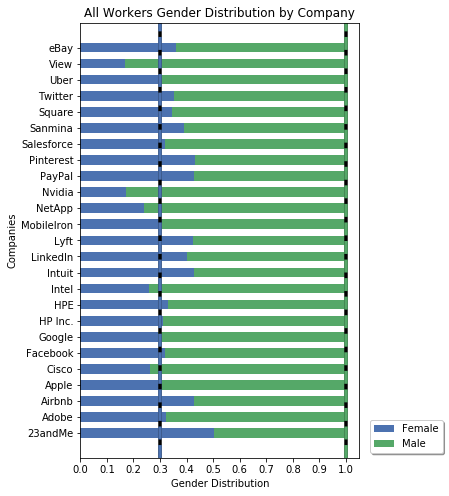

In [33]:
numCompanies = len(np.unique(distribution_data_gender['company']))
ind = np.arange(numCompanies)
height = 0.6

allWorker_criteria = distribution_data_gender['job_category'] == 'All Workers'

femaleProp = list(distribution_data_gender.loc[allWorker_criteria,]['proportion'])
maleProp = [(1 - x) for x in femaleProp]
companies = list(np.unique(distribution_data_gender['company']))

plt.style.use('seaborn-deep')

plt.figure(figsize=(5,8))

female = plt.barh(y = ind, width = femaleProp, height = height)
male = plt.barh(y = ind, width = maleProp, height = height, left = femaleProp)

plt.ylabel('Companies')
plt.xlabel('Gender Distribution')
plt.title('All Workers Gender Distribution by Company')
plt.yticks(ind, companies)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.legend((female[0], male[0]), ('Female', 'Male'),
          loc = 'lower left', bbox_to_anchor = (1.02, 0), shadow = True)

dist = 0
for gender in [['Female',female], ['Male',male]]:
    bars = [g for g in gender[1].get_children() if type(g) == Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]]
    dist = dist + float(gender_overall.loc[gender_overall['gender'] == gender[0], 'percentage']*0.01)
    plt.axvline(dist, color = 'black', linestyle = '-', linewidth = 3.5)
    plt.axvline(dist, color = colors[1], linestyle = '--', linewidth = 3.5)

plt.show()

Let's conduct a Chi-square Goodness-of-Fit test on this set of observations:

In [34]:
exp_arr = [float(gender_overall.loc[gender_overall['gender'] == 'Female', 'percentage']*0.01),
           float(gender_overall.loc[gender_overall['gender'] == 'Male', 'percentage']*0.01)]

In [35]:
chisquare(f_obs = np.array([femaleProp, maleProp]).T,
          f_exp = exp_arr)

Power_divergenceResult(statistic=array([0.63980503, 0.27469278]), pvalue=array([1., 1.]))

Since all p-values are close to 1, we conclude that the Silicon Valley tech companies' gender diversity data do not significantly differ from those of the tech industry on all-worker level.

## Gender Composition Overview: Executives and Managers

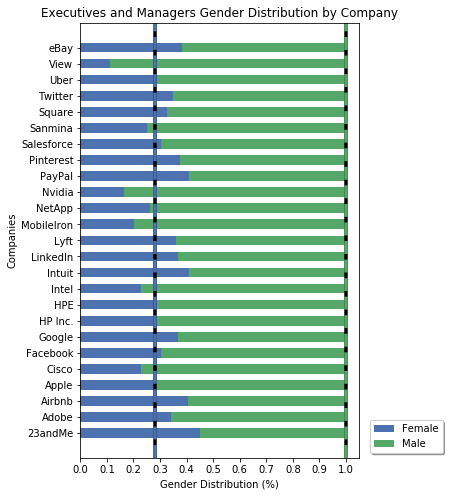

In [36]:
numCompanies = len(np.unique(distribution_data_gender['company']))
ind = np.arange(numCompanies)
height = 0.6

allWorker_criteria = distribution_data_gender['job_category'] == 'Executives and Managers'

femaleProp = list(distribution_data_gender.loc[allWorker_criteria,]['proportion'])
maleProp = [(1 - x) for x in femaleProp]
companies = list(np.unique(distribution_data_gender['company']))

plt.style.use('seaborn-deep')

plt.figure(figsize=(5,8))

female = plt.barh(y = ind, width = femaleProp, height = height)
male = plt.barh(y = ind, width = maleProp, height = height, left = femaleProp)

plt.ylabel('Companies')
plt.xlabel('Gender Distribution (%)')
plt.title('Executives and Managers Gender Distribution by Company')
plt.yticks(ind, companies)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.legend((female[0], male[0]), ('Female', 'Male'),
          loc = 'lower left', bbox_to_anchor = (1.02, 0), shadow = True)

dist = 0
for gender in [['Female',female], ['Male',male]]:
    bars = [g for g in gender[1].get_children() if type(g) == Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]]
    dist = dist + float(gender_execmgmt.loc[gender_execmgmt['gender'] == gender[0], 'percentage']*0.01)
    plt.axvline(dist, color = 'black', linestyle = '-', linewidth = 3.5)
    plt.axvline(dist, color = colors[1], linestyle = '--', linewidth = 3.5)

plt.show()

Let's conduct a Chi-square Goodness-of-Fit test on this set of observations:

In [37]:
exp_arr = [float(gender_execmgmt.loc[gender_execmgmt['gender'] == 'Female', 'percentage']*0.01),
           float(gender_execmgmt.loc[gender_execmgmt['gender'] == 'Male', 'percentage']*0.01)]

In [38]:
chisquare(f_obs = np.array([femaleProp, maleProp]).T,
          f_exp = exp_arr)

Power_divergenceResult(statistic=array([0.65021368, 0.25545272]), pvalue=array([1., 1.]))

Since all p-values are close to 1, we conclude that the Silicon Valley tech companies' gender diversity data do not significantly differ from those of the tech industry on both all-worker level and managers-and-above levels.

## Examine Correlations

Similar procedure for racial diversity analysis. We define <b>Gender Index</b> for each company as: $$GI = (Female\ Proportion)*(1-Female\ Proportion)$$, so we construct a column `GI` as the following:

In [39]:
distribution_data_gender['GI'] = distribution_data_gender['proportion']*(1-distribution_data_gender['proportion'])

We repeat the procedure used for racial diversity analysis:

In [40]:
temp = pd.merge(distribution_data_gender.loc[distribution_data_gender['job_category'] == "All Workers",]
                .groupby('company', as_index = False).agg({'GI':np.prod}),
                distribution_data_gender.loc[distribution_data_gender['job_category'] == "Executives",]
                .groupby('company', as_index = False).agg({'GI':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_gender.loc[distribution_data_gender['job_category'] == "Managers",]
                .groupby('company', as_index = False).agg({'GI':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp, 
                distribution_data_gender.loc[distribution_data_gender['job_category'] == "Professionals",]
                .groupby('company', as_index = False).agg({'GI':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_gender.loc[distribution_data_gender['job_category'] == "Others",]
                .groupby('company', as_index = False).agg({'GI':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_gender.loc[distribution_data_gender['job_category'] == "Executives and Managers",]
                .groupby('company', as_index = False).agg({'GI':np.prod}), on = "company", how = "inner")

temp = pd.merge(temp,
                distribution_data_gender.loc[distribution_data_gender['job_category'] == "Executives-Managers-Professionals",]
                .groupby('company', as_index = False).agg({'GI':np.prod}), on = "company", how = "inner")

gender_dist = temp

gender_dist.columns = ['company',
                       'gi_allWorkers',
                       'gi_executives',
                       'gi_managers',
                       'gi_professionals',
                       'gi_others',
                       'gi_exec_mgmt',
                       'gi_exec_mgmt_prof']

gender_dist_z = num_to_z_score(gender_dist)
gender_dist_z

,company,z_gi_allWorkers,z_gi_executives,z_gi_managers,z_gi_professionals,z_gi_others,z_gi_exec_mgmt,z_gi_exec_mgmt_prof
0,23andMe,1.144973,1.674208,1.109001,1.324714,-2.805693,1.139426,1.331792
1,Adobe,0.055512,-0.251824,0.490435,-0.107990,0.130763,0.512443,0.219277
2,Airbnb,0.971753,0.853109,1.091946,1.113016,0.641062,0.960610,1.104494
3,Apple,-0.135866,-0.341759,-0.344673,-0.831883,0.138122,-0.225748,-0.711468
4,Cisco,-0.802852,-0.114608,-1.036133,-0.734359,-0.051242,-0.864875,-0.805023
5,Facebook,-0.006562,0.687084,0.095866,-0.124519,0.693110,0.116740,-0.094583
6,Google,-0.342720,-1.165181,0.679026,-1.178507,0.714704,0.729274,-0.494775
7,HP Inc.,-0.096353,0.373589,-0.172411,0.487210,-0.405422,-0.102369,0.329929
8,HPE,0.162910,-0.541325,-0.059130,0.419848,0.262704,-0.090337,0.316367
9,Intel,-0.835729,-1.119166,-1.019743,-0.490206,-0.886561,-0.864875,-0.583719


## Gender Analysis: Exploring Correlations

Let's generate the correlation matrix as we did before:

In [41]:
combo_gender = pd.merge(sv_public, gender_dist_z, on = "company", how = "inner")
gender_corr = combo_gender.corr().drop(['TTM_Net_Margins',
                                        'TTM_Gross_Margins',
                                        'TTM_Operating_Margins',
                                        'EBITDA_Margins',
                                        'Pre-Tax_Profit_Margins'], axis = 1).head(5)
gender_corr

,z_gi_allWorkers,z_gi_executives,z_gi_managers,z_gi_professionals,z_gi_others,z_gi_exec_mgmt,z_gi_exec_mgmt_prof
TTM_Net_Margins,-0.018305,0.073207,0.327118,-0.278619,0.385253,0.291912,-0.121073
TTM_Gross_Margins,-0.113082,0.037220,-0.059709,-0.170750,0.138076,-0.028505,-0.079688
TTM_Operating_Margins,-0.065846,0.154047,0.281407,-0.124062,0.041304,0.266268,-0.043227
EBITDA_Margins,-0.071490,-0.099347,0.311441,-0.303710,0.362747,0.283927,-0.160604
Pre-Tax_Profit_Margins,-0.190994,-0.096618,0.205158,-0.433157,0.364158,0.157538,-0.302079


We observe that the correlation is still the highest between gender indeces of manager level and above and EBITDA margin, same as our conclusion for racial diversity analysis.

While there is still a correlation between EBITDA and gender diversity, it is much lower than the correlation between EBITDA and racial diversity. One of the reasons we think the results show this conclusion is because gender diversity doesn’t necessarily constitute that there are people from different cultures. There could be a lot of women from one race which means a high gender diversity but they are all influenced by the same culture. The argument for diversity is that it brings together many people from many different cultures in order to foster more efficient solutions. However, gender diversity doesn’t always 100% fit this argument which is evident in the example above. 

## Multivariate Regression: Gender Distribution's Influence on Company Profitability (EBITDA)

We conduct a multivariate regression in the same fashion:

In [42]:
gender_factors = combo_gender[['z_gi_executives', 'z_gi_managers','z_gi_professionals','z_gi_others']]
profitability = combo_gender['EBITDA_Margins']

gender_factors = sm.add_constant(gender_factors)
est = sm.OLS(profitability, gender_factors).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:         EBITDA_Margins   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     1.728
Date:                Thu, 20 Dec 2018   Prob (F-statistic):              0.204
Time:                        13:14:50   Log-Likelihood:                 7.7506
No. Observations:                  18   AIC:                            -5.501
Df Residuals:                      13   BIC:                            -1.049
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1809      0

C:\Users\weiti\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


The regression affirms our assumption that racial diversity is more impactful on EBITDA than gender diversity since none of the T-score values are significant. 

## Part III: Does gender diversity imply racial diversity?

We repeat the same data organization and cleaning procedure used to conduct analysis on the relationship between racial diversity and company profitability in Silicon Valley tech companies.

In [43]:
distribution_woman_race = distribution_data.loc[(distribution_data['demographics'].str.find('female') > -1)&
                                                (distribution_data['demographics'] != 'Underrepresented_minorities_female'),]
distribution_woman_race = distribution_woman_race.sort_values(by = ["company","job_category","demographics"], axis = 0)
distribution_woman_race['job_category'] = distribution_woman_race['job_category'].str.replace("Sales workers/admin support/technicians and others", "Others")
distribution_woman_race['percentage'] = distribution_woman_race['percentage'] * 0.01
distribution_woman_race = distribution_woman_race.rename(columns = {'percentage':'proportion'}).reset_index()
distribution_woman_race.head(5)

,index,company,proportion,demographics,job_category
0,5799,23andMe,0.131,Asian_female,All Workers
1,5938,23andMe,0.010,Black_or_African_American_female,All Workers
2,6166,23andMe,0.037,Hispanic_or_Latino_female,All Workers
3,5651,23andMe,0.283,White_female,All Workers
4,3493,23andMe,0.059,Asian_female,Executives


In [44]:
import math

In [45]:
woman_race_total = distribution_woman_race.groupby(['company','job_category']).agg({'proportion':np.sum})
distribution_woman_race['percentage'] = [distribution_woman_race['proportion'][n]/
                                         woman_race_total['proportion'][math.ceil((n+1)/4)-1] 
                                         for n in range(0, len(distribution_woman_race['proportion']))]
distribution_woman_race.head(5)

C:\Users\weiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


,index,company,proportion,demographics,job_category,percentage
0,5799,23andMe,0.131,Asian_female,All Workers,0.284165
1,5938,23andMe,0.010,Black_or_African_American_female,All Workers,0.021692
2,6166,23andMe,0.037,Hispanic_or_Latino_female,All Workers,0.080260
3,5651,23andMe,0.283,White_female,All Workers,0.613883
4,3493,23andMe,0.059,Asian_female,Executives,0.125265


## Women Racial Diveristy Composition Overview: All Workers

Similar to the corresponding section in racial diversity analysis, the vertical lines represent the corresponding sector average.

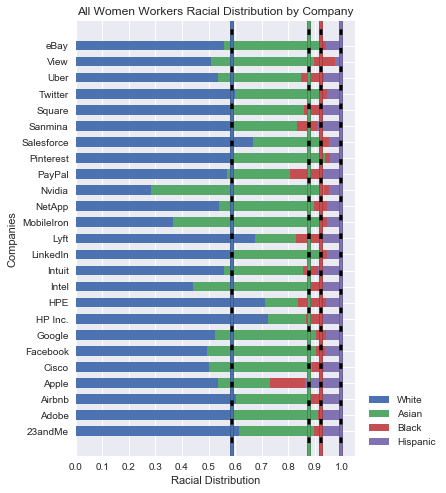

In [46]:
numCompanies = len(np.unique(distribution_woman_race['company']))
ind = np.arange(numCompanies)
height = 0.6

allWorker_criteria = distribution_woman_race['job_category'] == 'All Workers'

asianProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('Asian') > -1) &
                                                allWorker_criteria,]['percentage'])
whiteProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('White') > -1) & 
                                                allWorker_criteria,]['percentage'])
blackProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('Black') > -1) &
                                                allWorker_criteria,]['percentage'])
hispanicProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('Hispanic') > -1) &
                                                   allWorker_criteria,]['percentage'])
companies = list(np.unique(distribution_woman_race['company']))

plt.style.use('seaborn')

plt.figure(figsize=(5,8))

white = plt.barh(y = ind, width = whiteProp, height = height)
asian = plt.barh(y = ind, width = asianProp, height = height,
                 left = whiteProp)
black = plt.barh(y = ind, width = blackProp, height = height, 
                 left = [sum(x) for x in zip(asianProp, whiteProp)])
hispanic = plt.barh(y = ind, width = hispanicProp, height = height,
                    left = [sum(x) for x in zip(asianProp, whiteProp, blackProp)])

plt.ylabel('Companies')
plt.xlabel('Racial Distribution')
plt.title('All Women Workers Racial Distribution by Company')
plt.yticks(ind, companies)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.legend((white[0], asian[0], black[0], hispanic[0]), ('White', 'Asian', 'Black', 'Hispanic'),
          loc = 'lower left', bbox_to_anchor = (1.02, 0), shadow = True)

dist = 0
for race in [['White',white], ['Asian',asian], ['Black_or_African American',black], ['Hispanic_or_Latino', hispanic]]:
    bars = [r for r in race[1].get_children() if type(r) == Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]]
    dist = dist + float(race_overall.loc[race_overall['race_ethnicity'] == race[0], 'percentage']*0.01)
    plt.axvline(dist, color = 'black', linestyle = '-', linewidth = 3.5)
    plt.axvline(dist, color = colors[1], linestyle = '--', linewidth = 3.5)

plt.show()

Let's conduct a Chi-square Goodness-of-Fit test on this set of observations:

In [47]:
exp_arr = [float(race_overall.loc[race_overall['race_ethnicity'] == 'White', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Asian', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Black_or_African American', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Hispanic_or_Latino', 'percentage']*0.01)]

In [48]:
chisquare(f_obs = np.array([whiteProp, asianProp, blackProp, hispanicProp]).T,
          f_exp = exp_arr)

Power_divergenceResult(statistic=array([0.43155695, 1.26662417, 0.61266485, 0.17562999]), pvalue=array([1., 1., 1., 1.]))

Since all p-values are close to 1, we conclude that the Silicon Valley tech companies' gender diversity data do not significantly differ from those of the tech industry on all-worker level.

## Women Racial Diveristy Composition Overview: Executives and Managers

Similar to the corresponding section in racial diversity analysis, the vertical lines represent the corresponding sector average.

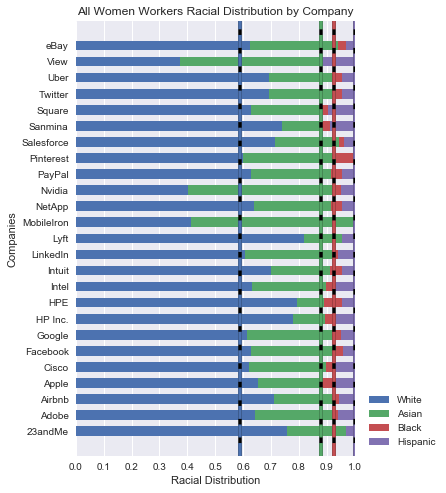

In [49]:
numCompanies = len(np.unique(distribution_woman_race['company']))
ind = np.arange(numCompanies)
height = 0.6

execmgmt_criteria = distribution_woman_race['job_category'] == 'Executives and Managers'

asianProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('Asian') > -1) &
                                                execmgmt_criteria,]['percentage'])
whiteProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('White') > -1) & 
                                                execmgmt_criteria,]['percentage'])
blackProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('Black') > -1) &
                                                execmgmt_criteria,]['percentage'])
hispanicProp = list(distribution_woman_race.loc[(distribution_woman_race['demographics'].str.find('Hispanic') > -1) &
                                                   execmgmt_criteria,]['percentage'])
companies = list(np.unique(distribution_woman_race['company']))

plt.style.use('seaborn')

plt.figure(figsize=(5,8))

white = plt.barh(y = ind, width = whiteProp, height = height)
asian = plt.barh(y = ind, width = asianProp, height = height,
                 left = whiteProp)
black = plt.barh(y = ind, width = blackProp, height = height, 
                 left = [sum(x) for x in zip(asianProp, whiteProp)])
hispanic = plt.barh(y = ind, width = hispanicProp, height = height,
                    left = [sum(x) for x in zip(asianProp, whiteProp, blackProp)])

plt.ylabel('Companies')
plt.xlabel('Racial Distribution')
plt.title('All Women Workers Racial Distribution by Company')
plt.yticks(ind, companies)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.legend((white[0], asian[0], black[0], hispanic[0]), ('White', 'Asian', 'Black', 'Hispanic'),
          loc = 'lower left', bbox_to_anchor = (1.02, 0), shadow = True)

dist = 0
for race in [['White',white], ['Asian',asian], ['Black_or_African American',black], ['Hispanic_or_Latino', hispanic]]:
    bars = [r for r in race[1].get_children() if type(r) == Rectangle]
    colors = [c.get_facecolor() for c in bars[:-1]]
    dist = dist + float(race_overall.loc[race_overall['race_ethnicity'] == race[0], 'percentage']*0.01)
    plt.axvline(dist, color = 'black', linestyle = '-', linewidth = 3.5)
    plt.axvline(dist, color = colors[1], linestyle = '--', linewidth = 3.5)

plt.show()

Let's conduct a Chi-square Goodness-of-Fit test on this set of observations:

In [50]:
exp_arr = [float(race_overall.loc[race_overall['race_ethnicity'] == 'White', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Asian', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Black_or_African American', 'percentage']*0.01),
           float(race_overall.loc[race_overall['race_ethnicity'] == 'Hispanic_or_Latino', 'percentage']*0.01)]

In [51]:
chisquare(f_obs = np.array([whiteProp, asianProp, blackProp, hispanicProp]).T,
          f_exp = exp_arr)

Power_divergenceResult(statistic=array([0.63255458, 1.17152564, 0.36717048, 0.39317596]), pvalue=array([1., 1., 1., 1.]))

Since all p-values are close to 1, we conclude that the Silicon Valley tech companies' gender diversity data do not significantly differ from those of the tech industry on executive and management level.

## Part IV: Explore clusters

For the last part of the project, we will explore company clusters formed by racial and gender indices at executives and management level and explore the profitability indicator in each cluster. To visualize our cluster findings, we will graph companies by their Executive / Management Racial Diversity Z Score (x) and their Executive / Management Gender Diversity Z Score (y):

Text(0,0.5,'Executive / Management Gender Diversity Z Score')

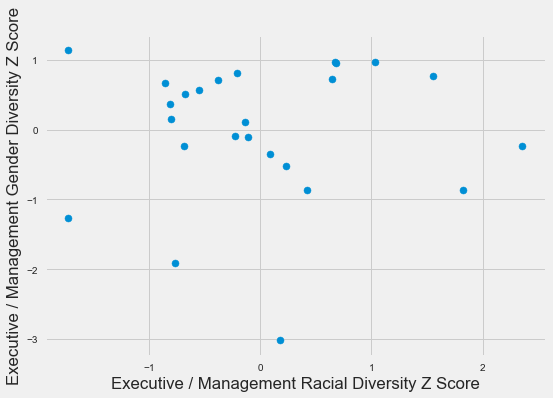

In [52]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()
cluster_data = pd.merge(racial_dist_z[['company','z_ri_exec_mgmt']],
                        gender_dist_z[['company','z_gi_exec_mgmt']],
                        on = "company", how = "inner")
ax.scatter(x = cluster_data['z_ri_exec_mgmt'], y = cluster_data['z_gi_exec_mgmt'])

ax.set_xlabel('Executive / Management Racial Diversity Z Score')
ax.set_ylabel('Executive / Management Gender Diversity Z Score')

Now, let's import and apply the Agglomerative Clustering function from sklearn:

In [53]:
from sklearn.cluster import AgglomerativeClustering as aggCluster

In [54]:
cluster_data['cluster'] = aggCluster(n_clusters = 5).fit_predict(cluster_data.set_index('company'))
cluster_data['cluster'] = [n + 1 for n in cluster_data['cluster']]
cluster_data = pd.merge(cluster_data, sv_public[['company','EBITDA_Margins']], on = "company", how = "inner")
cluster_data

,company,z_ri_exec_mgmt,z_gi_exec_mgmt,cluster,EBITDA_Margins
0,Adobe,-0.676166,0.512443,3,0.3417
1,Apple,2.356307,-0.225748,4,0.3198
2,Cisco,0.417085,-0.864875,2,0.2952
3,Facebook,-0.139636,0.116740,2,0.4529
4,Google,0.648406,0.729274,5,0.3308
5,HP Inc.,-0.113427,-0.102369,2,0.0805
6,HPE,-0.229605,-0.090337,2,0.3536
7,Intel,1.818801,-0.864875,4,0.3581
8,Intuit,0.673591,0.976032,5,0.3043
9,MobileIron,-1.724489,-1.261551,1,-0.3780


The after-clustering set is represented as the following:

In [55]:
import matplotlib.patches as mpatches

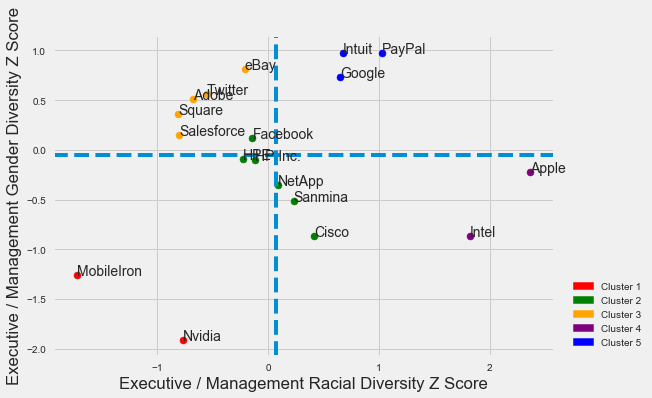

In [56]:
fig, ax = plt.subplots()
ax.scatter(cluster_data.loc[cluster_data['cluster'] == 0+1,'z_ri_exec_mgmt'],
           cluster_data.loc[cluster_data['cluster'] == 0+1,'z_gi_exec_mgmt'],
           color = 'red')
ax.scatter(cluster_data.loc[cluster_data['cluster'] == 1+1,'z_ri_exec_mgmt'],
           cluster_data.loc[cluster_data['cluster'] == 1+1,'z_gi_exec_mgmt'],
           color = 'green')
ax.scatter(cluster_data.loc[cluster_data['cluster'] == 2+1,'z_ri_exec_mgmt'],
           cluster_data.loc[cluster_data['cluster'] == 2+1,'z_gi_exec_mgmt'],
           color = 'orange')
ax.scatter(cluster_data.loc[cluster_data['cluster'] == 3+1,'z_ri_exec_mgmt'],
           cluster_data.loc[cluster_data['cluster'] == 3+1,'z_gi_exec_mgmt'],
           color = 'purple')
ax.scatter(cluster_data.loc[cluster_data['cluster'] == 4+1,'z_ri_exec_mgmt'],
           cluster_data.loc[cluster_data['cluster'] == 4+1,'z_gi_exec_mgmt'],
           color = 'blue')

ax.set_xlabel('Executive / Management Racial Diversity Z Score')
ax.set_ylabel('Executive / Management Gender Diversity Z Score')

for i in range(0, len(cluster_data)):
    ax.annotate(cluster_data.loc[i,'company'], (cluster_data.loc[i, 'z_ri_exec_mgmt'],
                                                cluster_data.loc[i, 'z_gi_exec_mgmt']))
    
plt.axvline(cluster_data['z_ri_exec_mgmt'].mean(), linestyle = '--')
plt.axhline(cluster_data['z_gi_exec_mgmt'].mean(), linestyle = '--')

cluster0_patch = mpatches.Patch(color='red', label='Cluster 1')
cluster1_patch = mpatches.Patch(color='green', label='Cluster 2')
cluster2_patch = mpatches.Patch(color='orange', label='Cluster 3')
cluster3_patch = mpatches.Patch(color='purple', label='Cluster 4')
cluster4_patch = mpatches.Patch(color='blue', label='Cluster 5')
plt.legend(handles = [cluster0_patch, cluster1_patch, cluster2_patch, cluster3_patch, cluster4_patch],
          loc = 'lower left', bbox_to_anchor = (1.02, 0), shadow = True)

We have five clusters: the average in both indicator (2), the excellent in both (5), the underperforming in both (1), the excellent only for gender (3), and the excellent only for racial (4). Now, we will make boxplots to visualize and summarize the cluster profitability measures:

Text(0.5,1,'Clusters and Profitability')

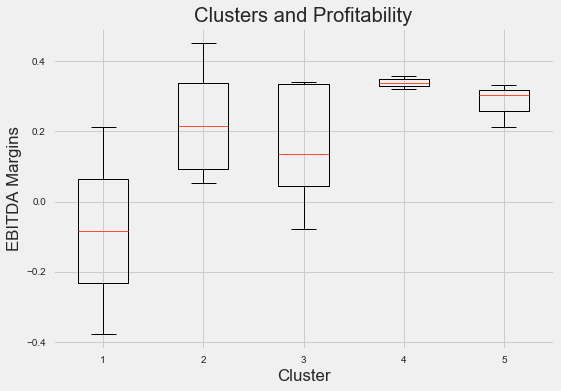

In [57]:
box_data = [0, 0, 0, 0, 0] 
for n in np.unique(cluster_data['cluster'])-1:
    box_data[n] = cluster_data.loc[cluster_data['cluster'] == n+1,'EBITDA_Margins']
fig, ax = plt.subplots()
bp = ax.boxplot(box_data)
ax.set_xlabel('Cluster')
ax.set_ylabel('EBITDA Margins')
ax.set_title('Clusters and Profitability')

According to the visualization, Cluster 4 (the excellent only for racial) has the highest average profitability measure; however, we should take into account the fact that Cluster 4 only has two companies, making it much less an indicator of overall profitability of companies only excellent in racial diversity measures. Excluding cluster 4, the rest of the clusters shows that by being excellent in both measures (cluster 5) is better than being average in both measures (cluster 2), which is better than being excellent only in gender (cluster 3), which is better than being underperforming in both measures (cluster 1).
This result affirms our previous conclusion that racial diversity may be more important in explaining company profitability and intellectual diversity because cluster 2 (average in both) is better than cluster 3 (excellent only in gender).

# Conclusion

Through this project, we were able to show the relationship between racial and gender diversity on a company’s EBITDA. We observed that racial diversity is much more correlated with a company’s profitability measures, and we suggested that this is a result of the fact that diverse cultural experience and problem-solving approach are part of racial diversity, and people of different gender may have similar problem-solving approaches within the same race or culture. We further broke this problem down showing the impact of diversity on each level of employment. Though we had many interesting insights, the scope of the project was limited because we measured the success of a company purely on an economic register. There are many other ways to measure a company’s success such as happiness of employees or philanthropic impact. Secondly, the sample size of our project was limited due to many companies not disclosing the gender and racial breakdown of their employees. Finally, correlation doesn’t necessarily mean causation, so there is the possibility that diversity isn’t directly related to the growth or decline of a company’s profitability. 


# Bibliography

1)A Brief History Of Diversity in the Workplace - Hi Diversity!
https://es.coursera.org/lecture/diversity-inclusion-workplace/a-brief-history-of-diversity-in-the-workplace-R1tkT

2)Why Diversity Matters
Vivian Hunt-Dennis Layton-Sara Prince - https://www.mckinsey.com/business-functions/organization/our-insights/why-diversity-matters

3)Ben-Ner, Avner. “Do We Prefer People Who Are Similar to Us? Experimental Evidence on Giving and Work Behaviors .” Yale, Yale, conf.som.yale.edu/obsummer07/PaperBen-NerKramer.pdf.

4)Macrotrends | The Long Term Perspective on Markets
https://www.macrotrends.net/

5)10 Most Diverse Industries in the Us, Ranked
https://tech.co/news/diverse-industries-us-ranked-2017-10

6)Silicon Valley Diversity Data
Rachael Tatman - https://www.kaggle.com/rtatman/silicon-valley-diversity-data 

## GitHub Link

https://github.com/whong26/Data_Bootcamp